In [110]:
def timing(func):
    def wrap(*args, **kw):
        ts = time()
        result = func(*args,**kw)
        te = time()
        tdelta = round(1000*(te-ts),3)
        print (f"Function'{func.__name__}' took {tdelta} milliseconds to run")
        return result
    return wrap

Code above for writing a timing decorator to measure the function execution time.

In [114]:
from time import time

finding the length of a list

In [115]:
def list_length(a):
    if isinstance(a,list):
       
        s = len(a)
        return s
    else:
        print("Argument is not a list")

In [116]:
list_length([1,2,3])

3

Below returns the execution time.

In [117]:
def time_return(func):
    def wrap(*args, **kw):
        ts = time_return()
        result = func(*args,**kw)
        te = time_return()
        tdelta = round(1000*(te-ts),3)
        return tdelta
    return wrap

Another demo function is wrapped with it.

In [118]:
def numpy_matmul(a,b):
    return (np.matmul(a,b))

It measures the time taken to compute matrix multiplication from two given numpy arrays

In [119]:
import numpy as np

In [120]:
SIZE = 1000
a = np.random.beta(1.0,2.0,size=(SIZE,SIZE))
b = np.random.beta(1.0,2.0,size=(SIZE,SIZE))
numpy_matmul(a,b)

array([[109.84018722, 110.34879717, 110.39811821, ..., 110.11242903,
        111.23959322, 106.56683484],
       [111.04866174, 109.19262039, 110.0000805 , ..., 109.32599376,
        111.53905525, 111.18451839],
       [120.91745141, 117.65361608, 115.53177138, ..., 115.82627949,
        117.70448233, 112.81124074],
       ...,
       [117.82207977, 115.84633184, 114.82149431, ..., 117.0070878 ,
        119.86107571, 116.3365266 ],
       [115.98797081, 117.21232913, 115.8140629 , ..., 117.21438358,
        113.4999843 , 111.97462128],
       [117.51766432, 115.9386776 , 112.56456028, ..., 116.93622677,
        116.29863434, 109.0427744 ]])

Writing a Compact loop with the function and observe how the execution time varies with input size

In [121]:
SIZE = [500,1000,2000,3000,4000,5000]
for s in SIZE:
    a = np.random.beta(1.0,2.0,size=(s,s))
    b = np.random.beta(1.0,2.0,size=(s,s))
    t = numpy_matmul(a,b)
    print(f"Matrix multiplication of size ({s}*{s}) took {t} milliseconds")


Matrix multiplication of size (500*500) took [[62.62116699 62.20609665 62.64494876 ... 59.07479976 65.66128059
  58.15637557]
 [58.51207163 55.71378578 56.27385853 ... 54.26832355 59.22393002
  51.7190476 ]
 [58.90460039 56.35124102 56.03897249 ... 55.58932399 57.32725265
  54.92902205]
 ...
 [56.33790589 55.3725742  52.12009371 ... 54.12916495 57.13531288
  55.51367325]
 [58.68530687 60.4510826  54.36363701 ... 54.66505056 59.92778795
  54.99679603]
 [54.93904476 56.23726821 54.01816257 ... 56.30726878 58.26981902
  54.87327442]] milliseconds
Matrix multiplication of size (1000*1000) took [[111.4284468  113.19652349 106.33376835 ... 102.37185797 111.222868
  112.76846432]
 [109.9981571  113.86558876 109.08673955 ... 104.92486304 109.67376666
  114.59389468]
 [116.88584377 121.85105552 117.4370306  ... 112.53977056 117.947104
  120.39039465]
 ...
 [108.13587711 114.90816128 107.14900303 ... 103.67662783 109.86523304
  115.13847916]
 [117.83320597 117.33287843 113.52787267 ... 110.09713

Now, I will add ML estimator(from Scikit-learn) into the mix. As we are enthusiastic about both the execution speed and the performance of Machine Learning,I will return both the time-delta and the ML metric in my case. In this code, I will return a tuple: return (tdelta,result)

In [122]:
import functools
from functools import wraps

In [128]:
from math import log

In [139]:
def time_estimator(f):
    @wraps(f)
    def wrap(*args, **kw):
        tstart = time()
        result = f(*args, **kw)
        tend = time()
        tdelta = round(1000*(tend-tstart),3)
        return (tdelta,result)
    return wrap



This function will decorate a scoring function that will fit the given data and return the accuracy score
(on a test/validation set)

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
@time_estimator
def classifier_accuracy(estimator,x,y):
    X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33, random_state=42)
    estimator.fit(X_train,y_train)
    score = estimator.score(X_test,y_test)
    return round(score,3)

In this code, I will make some synthethic data and initialize a logistic regression estimator.

In [142]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegressionCV
data = make_classification(n_samples=1000,n_features=20,n_informative=20,n_redundant=0,flip_y=0.05,class_sep=1.5)
X,y = data[0],data[1]
log_model = LogisticRegressionCV()

Running the classifier_accuracy function, I get both the execution time and the accuracy score

In [143]:
classifier_accuracy(log_model,X,y)

(140.265, 0.909)

Modify the data and record execution time

In [145]:
SIZE = [1000+500*i for i in range(21)]
log_model = LogisticRegressionCV()
model_time, model_acc = [],[]
for s in SIZE:
    data = make_classification(n_samples=s,n_features=20,n_informative=20,n_redundant=0,flip_y=0.05,class_sep=1.5)
    x,y = data[0],data[1]
    m_time, m_acc = classifier_accuracy(log_model,x,y)
    model_time.append(m_time)
    model_acc.append(m_acc)

Play with the estimator to optimize the cost-performance

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
num_trees = [5*x for x in range(1,21)]
model_time, model_acc = [],[]
data = make_classification(n_samples=1000,n_features=20,n_informative=20,n_redundant=0,flip_y=0.05,class_sep=1.0)
x,y = data[0],data[1]
for n in num_trees:
    rf_model = RandomForestClassifier(n_estimators=n)
    m_time, m_acc = classifier_accuracy(rf_model,x,y)
    model_time.append(1/m_time)
    model_acc.append(m_acc)

In [157]:
import matplotlib.pyplot as plt
model_opt = model_acc + model_time


<function matplotlib.pyplot.show(close=None, block=None)>

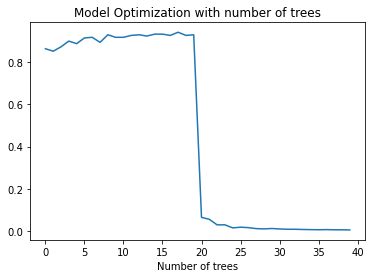

In [160]:
plt.title('Model Optimization with number of trees')
plt.xlabel('Number of trees')
plt.plot(model_opt)
plt.show

I can select 16 treees for this model.